In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Attribute Information:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 

In [2]:
data = pd.read_csv('datasets/data_banknote_authentication.txt',header=None)

In [3]:
data.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']

In [4]:
data['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

### Checking Scatter Plot of all features

<Figure size 432x288 with 0 Axes>

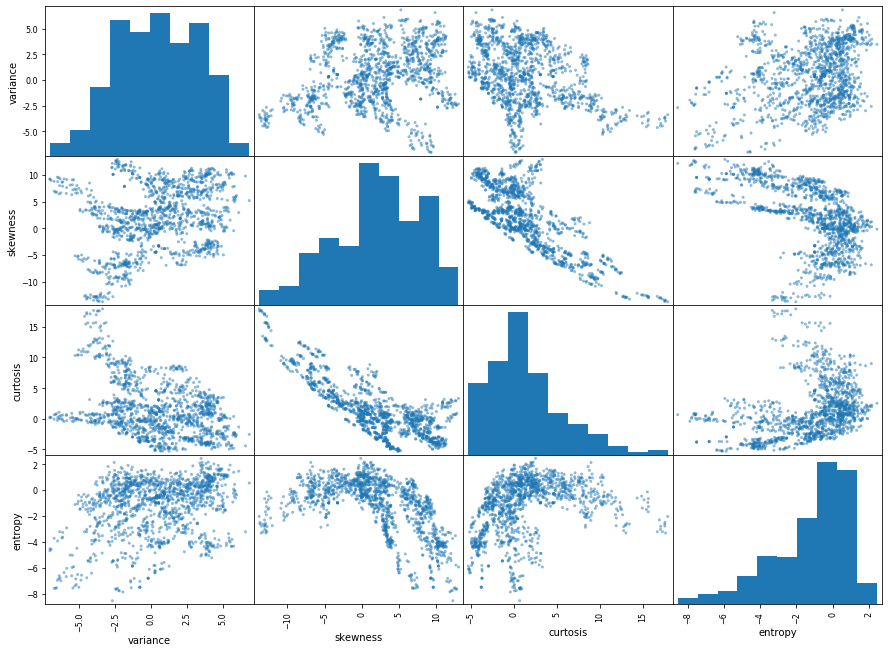

In [5]:
plt.clf()
from pandas.plotting import scatter_matrix
scatter_matrix(data.iloc[:,0:4], figsize=(15,11))
plt.show()

<Figure size 432x288 with 0 Axes>

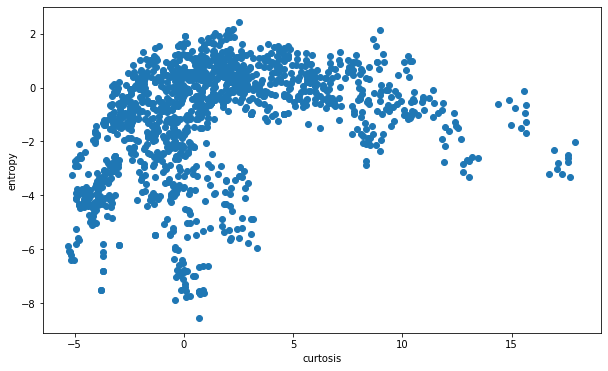

In [6]:
plt.clf()
plt.figure(figsize=(10,6))
plt.scatter(data.iloc[:,2], data.iloc[:,3])
plt.xlabel(data.columns[2])
plt.ylabel(data.columns[3])
plt.show()

<Figure size 432x288 with 0 Axes>

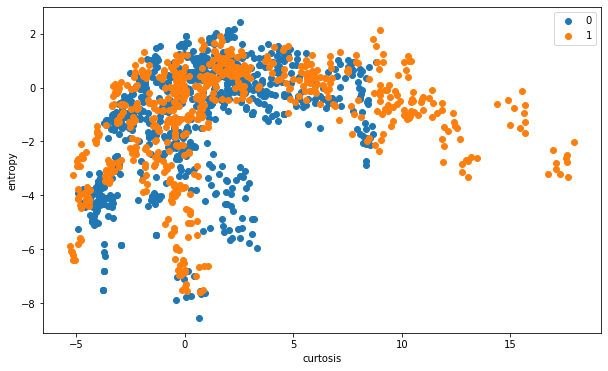

In [7]:
plt.clf()
plt.figure(figsize = (10, 6))
names = ['0','1']
colors = ['b','r','g']
label = (data['class']).astype(np.int)
plt.xlabel(data.columns[2])
plt.ylabel(data.columns[3])
for i in range(len(names)):
    bucket = data[data['class'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i]) 
plt.legend()
plt.show()

In [8]:
data.iloc[:,[1,4]]

,skewness,class
0,8.66610,0
1,8.16740,0
2,-2.63830,0
3,9.52280,0
4,-4.45520,0
...,...,...
1367,1.34920,1
1368,-4.87730,1
1369,-13.45860,1
1370,-8.38270,1


<Figure size 432x288 with 0 Axes>

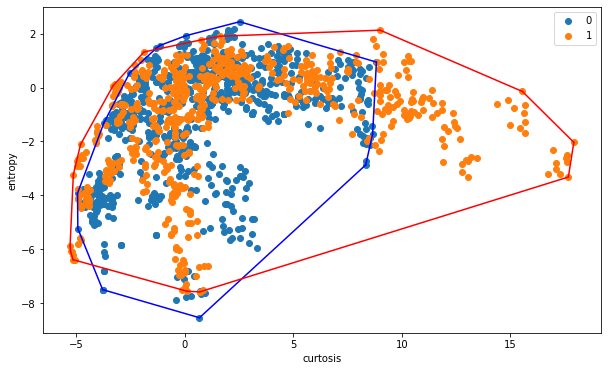

In [9]:
from scipy.spatial import ConvexHull
 
plt.clf()
plt.figure(figsize = (10, 6))
names = ['0','1']
label = (data['class']).astype(np.int)
colors = ['b','r','g']
plt.xlabel(data.columns[2])
plt.ylabel(data.columns[3])
for i in range(len(names)):
    bucket = data[data['class'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull = ConvexHull(bucket)
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i]) 
    for j in hull.simplices:
        plt.plot(bucket[j,0], bucket[j,1], colors[i])
plt.legend()
plt.show()

In [10]:
# used a for loop - for future use, when there will be multiclass classifcation
from scipy.optimize import linprog
 
dic = {0: '0', 1: '1'}
 
for i in dic.keys():
    data["newTarget"] = np.where(data['class'] == i, 1 , -1)
     
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    tmp = data.iloc[:,[2,3]].values
    tmp = sc.fit_transform(tmp)
 
    xx = np.array(data.newTarget.values.reshape(-1,1) * tmp)
    t = np.where(data['class'] == i, 1 , -1)
     
    #2-D array which, when matrix-multiplied by x, gives the values of 
    #the upper-bound inequality constraints at x.
    A_ub = np.append(xx, t.reshape(-1,1), 1)
     
    #1-D array of values representing the upper-bound of each 
    #inequality constraint (row) in A_ub.
    b_ub = np.repeat(-1, A_ub.shape[0]).reshape(-1,1)
     
    # Coefficients of the linear objective function to be minimized.
    c_obj = np.repeat(1, A_ub.shape[1])
    res = linprog(c=c_obj, A_ub=A_ub, b_ub=b_ub,
                  options={"disp": False})
     
    if res.success:
        print('There is linear separability')
    else:
        print('No linear separability')
    break #remove break in case of multiclass classification 

No linear separability


In [11]:
# The given data is not linearly separable.

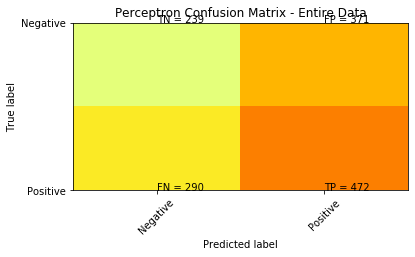

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


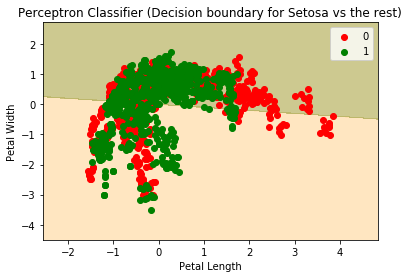

In [12]:
# Machine Learning Techniques (Perceptron and SVM)

# Data Preprocessing
# Define our X and Y (Dependent and Target Variables)
x = data.iloc[:, [2,3]].values
# we are picking Setosa to be 1 and all other classes will be 0
y = (data['class'] == 0).astype(np.int) 
 
#Perform feature scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x = sc.fit_transform(x)

#Building our perceptron model
from sklearn.linear_model import Perceptron
perceptron = Perceptron(random_state = 0)
perceptron.fit(x, y)
predicted = perceptron.predict(x)

#Plotting confusion matrix for the Perceptron against the Setosa class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, predicted)

plt.clf() 
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('Perceptron Confusion Matrix - Entire Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()
        
# Draw our decision boundary for the Perceptron against Setosa class
from matplotlib.colors import ListedColormap
plt.clf()
X_set, y_set = x, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, perceptron.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('navajowhite', 'darkkhaki')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Perceptron Classifier (Decision boundary for Setosa vs the rest)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

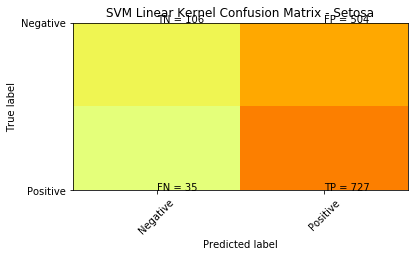

In [13]:
# Confusion Matrix for SVM with Linear Kernel
from sklearn.svm import SVC
svm = SVC(C=1.0, kernel='linear', random_state=0)
svm.fit(x, y)
 
predicted = svm.predict(x)
 
cm = confusion_matrix(y, predicted)

plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('SVM Linear Kernel Confusion Matrix - Setosa')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


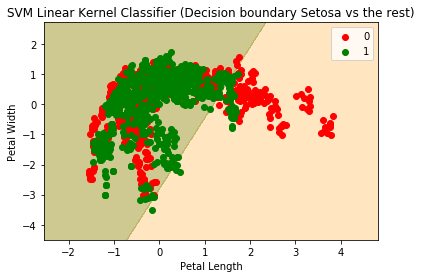

In [14]:
# Plot our decision boundary for SVM with Linear Kernel
from matplotlib.colors import ListedColormap
plt.clf()
X_set, y_set = x, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('navajowhite', 'darkkhaki')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Linear Kernel Classifier (Decision boundary Setosa vs the rest)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

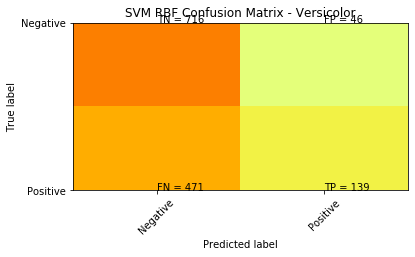

In [15]:
# Confusion Matrix for SVM with RBG Kernel
x = data.iloc[:, [2,3]].values
y = (data['class'] == 1).astype(np.int) # we are picking Versicolor to be 1 and all other classes will be 0
 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
 
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0)
svm.fit(x, y)
 
predicted = svm.predict(x)
 
cm = confusion_matrix(y, predicted)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.title('SVM RBF Confusion Matrix - Versicolor')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
 
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


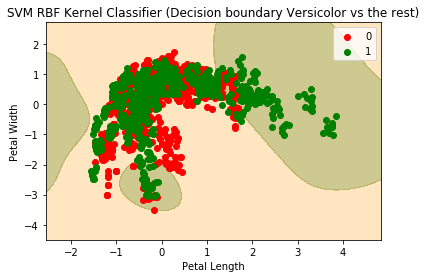

In [16]:
# Plot our decision boundary for SVM with RBF Kernel
from matplotlib.colors import ListedColormap
plt.clf()
X_set, y_set = x, y
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('navajowhite', 'darkkhaki')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM RBF Kernel Classifier (Decision boundary Versicolor vs the rest)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()